# import main libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = os.path.join(os.getcwd(), "DateSet/titanic.csv")
df_titanic = pd.read_csv(path)

df_titanic.head()

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Gender       891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_titanic.isna().sum()

PassengerId      0
Name             0
Pclass           0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [5]:
fare_vals = df_titanic['Fare'].value_counts()
fare_vals

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [6]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())


In [7]:
df_titanic['Age'].value_counts().max()

177

<function matplotlib.pyplot.show(close=None, block=None)>

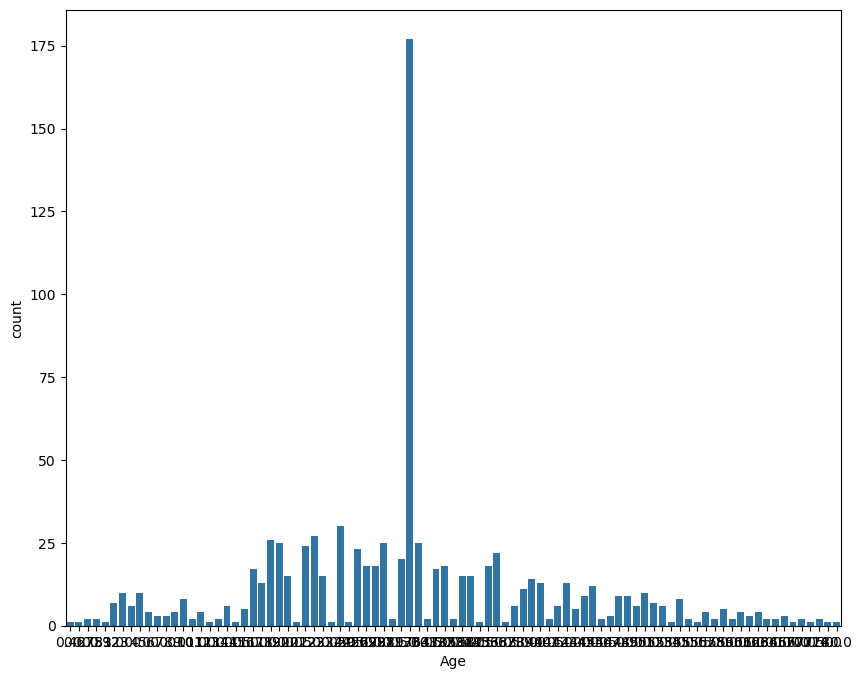

In [8]:
age = df_titanic['Age'].value_counts
plt.figure(figsize=(10,8))
sns.countplot(x = 'Age', data = df_titanic)
plt.show

In [9]:
df_titanic.isna().sum()

PassengerId      0
Name             0
Pclass           0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Survived'}>, <Axes: >, <Axes: >]],
      dtype=object)

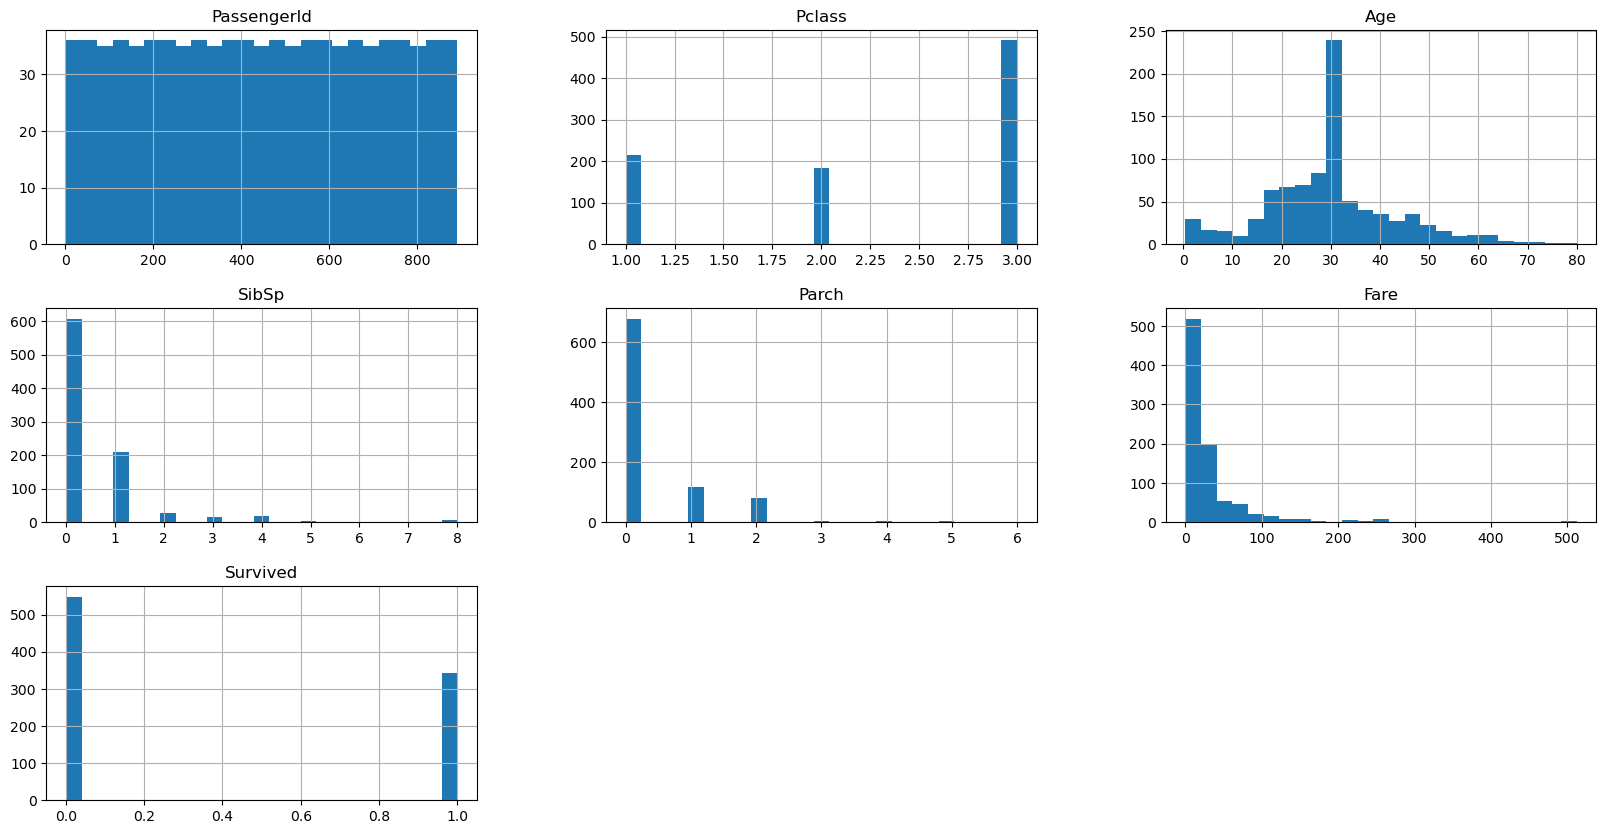

In [10]:
df_titanic.hist(bins=25, figsize=(20,10))

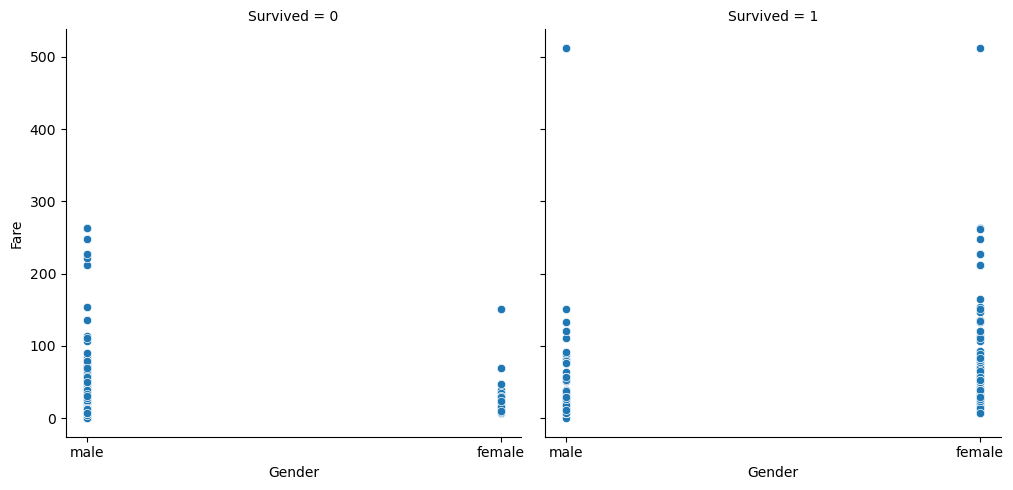

In [11]:
sns.relplot(x = 'Gender', y = 'Fare', data=df_titanic, col='Survived', col_wrap=3)

In [12]:
df_titanic = pd.get_dummies(df_titanic, columns=['Gender'])
df_titanic

,PassengerId,Name,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Gender_female,Gender_male
0,1,"Braund, Mr. Owen Harris",3,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,"Heikkinen, Miss. Laina",3,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,1,1,0
4,5,"Allen, Mr. William Henry",3,35.000000,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,27.000000,0,0,211536,13.0000,NaN,S,0,0,1
887,888,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S,1,1,0
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,1,0
889,890,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,1,0,1


### removing unwanted fearures

In [13]:
df_titanic.drop(['PassengerId', 'Name', 'SibSp', 'Ticket', 'Embarked','Cabin','Parch' ], axis=1, inplace=True)

### scalling the data 0 to 1

In [14]:
cols= df_titanic.columns
scaled =preprocessing.MinMaxScaler(feature_range=(0,1))
titanic=scaled.fit_transform(df_titanic)

In [15]:
df_titanic= pd.DataFrame(data=titanic, columns=cols)

In [16]:
x = df_titanic.drop(['Survived'], axis=1)
y = df_titanic['Survived']

###splitting the data 

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.14, random_state= 45, shuffle=True)

In [18]:
model=DecisionTreeClassifier(max_depth=3,min_samples_split=150,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=150)

In [19]:
y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7631578947368421
[[78  8]
 [10 29]]


In [20]:
model.score(x_test, y_test)

0.856

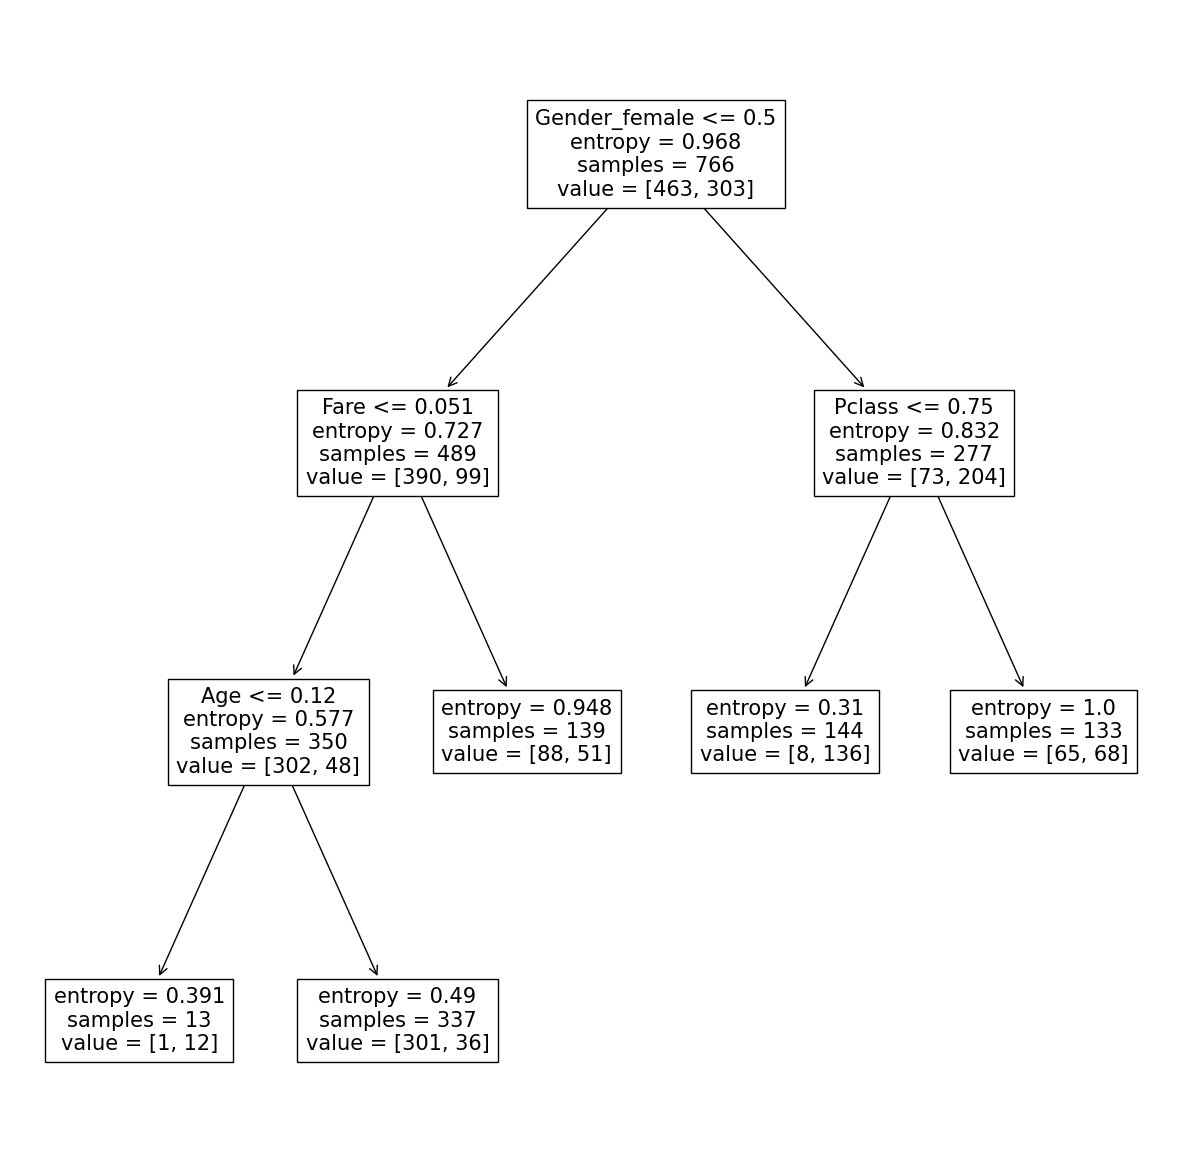

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
DC_tree=plot_tree(model, feature_names=['Pclass', 'Age', 'Fare', 'Gender_female', 'Gender_male'])
plt.show()

### KNN model 

In [22]:
KNN_list=[]
for i in range(1, 30):
    model_KNN= KNeighborsClassifier(n_neighbors=i)
    model_KNN.fit(x_train, y_train)
    KNN_list.append(model_KNN.score(x_test, y_test))
    i+=1
KNN_list

[0.856,
 0.912,
 0.888,
 0.88,
 0.864,
 0.88,
 0.872,
 0.888,
 0.88,
 0.888,
 0.872,
 0.88,
 0.88,
 0.888,
 0.872,
 0.888,
 0.88,
 0.88,
 0.864,
 0.864,
 0.856,
 0.872,
 0.864,
 0.872,
 0.872,
 0.864,
 0.872,
 0.864,
 0.872]

##NOTE 
##according to this apove N= 2 has the highest accuracy 

In [23]:
model_KNN_final= KNeighborsClassifier(n_neighbors=2)
model_KNN_final.fit(x_train, y_train)
y_pred_knn = model_KNN_final.predict(x_test)
print(model_KNN_final.score(x_test, y_test))
print(f1_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

0.912
0.8450704225352113
[[84  2]
 [ 9 30]]


#Logistic regression model 

In [24]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
print(lr_model.score(x_test, y_test))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.856
0.7631578947368421
[[78  8]
 [10 29]]
